## Домашняя работа по методу кросс-энтропии

### Задание №1
#### Пользуясь алгоритмом Кросс-Энтропии обучить агента решать задачу Taxi-v3 из Gym. Исследовать гиперпараметры алгоритма и выбрать лучшие.

Реализован алгоритм в файле hw11.py.

In [1]:
from hw11 import main_func, AgentCrossEntropy
from hw12 import AgentCrossEntropyLaplace
from hw13 import main_func_stohastic
import gym
import matplotlib.pyplot as plt
import numpy as np

In [3]:
# actions 0: move south 1: move north 2: move east 3: move west : pickup passenger 5: drop off passenger
action_n = 6
# location taxi 0 - 24
taxi_loc_n = 25
# pass_loc 0: R(ed) 1: G(reen) 2: Y(ellow) 3: B(lue) 4: in taxi
pass_loc_n = 5
# 0: R(ed) 1: G(reen) 2: Y(ellow) 3: B(lue)
dest_loc_n = 4

In [32]:
%%time
env = gym.make('Taxi-v3')
agent = AgentCrossEntropy(action_n, taxi_loc_n, pass_loc_n, dest_loc_n)
rewards_q03 = main_func(env, agent, q=0.3, n_iteration=20, n_trajectories=1000)

CPU times: user 2min 6s, sys: 276 ms, total: 2min 6s
Wall time: 2min 6s


In [33]:
%%time
env = gym.make('Taxi-v3')
agent = AgentCrossEntropy(action_n, taxi_loc_n, pass_loc_n, dest_loc_n)
rewards_q05 = main_func(env, agent, q=0.5, n_iteration=20, n_trajectories=1000)

CPU times: user 1min 9s, sys: 156 ms, total: 1min 9s
Wall time: 1min 9s


In [34]:
%%time
env = gym.make('Taxi-v3')
agent = AgentCrossEntropy(action_n, taxi_loc_n, pass_loc_n, dest_loc_n)
rewards_q07 = main_func(env, agent, q=0.7, n_iteration=20, n_trajectories=1000)

CPU times: user 51.2 s, sys: 188 ms, total: 51.4 s
Wall time: 51.3 s


In [35]:
%%time
env = gym.make('Taxi-v3')
agent = AgentCrossEntropy(action_n, taxi_loc_n, pass_loc_n, dest_loc_n)
rewards_q09 = main_func(env, agent, q=0.9, n_iteration=20, n_trajectories=1000)

CPU times: user 51.8 s, sys: 44.2 ms, total: 51.9 s
Wall time: 51.8 s


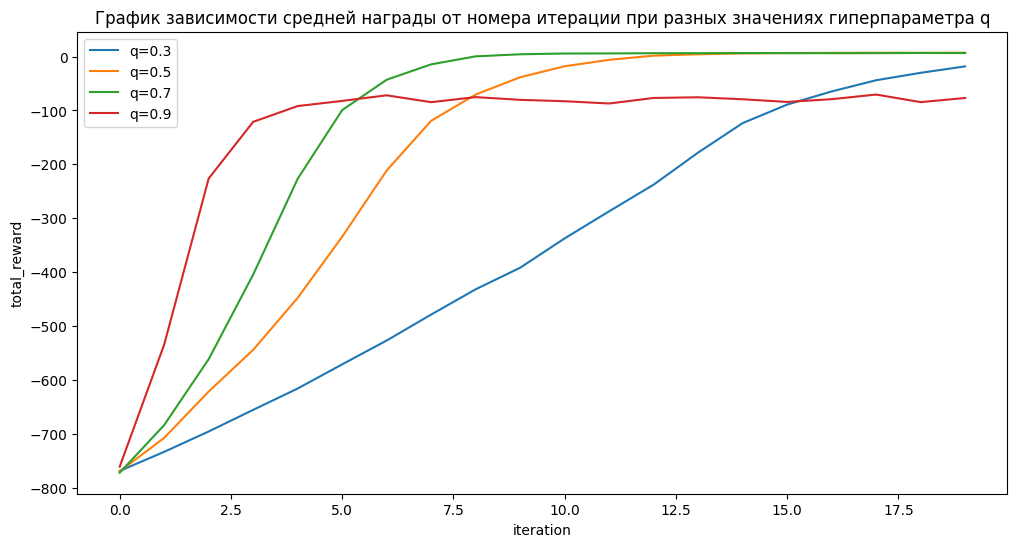

In [51]:
plt.figure(figsize=(12,6))
plt.plot(np.arange(0, 20), rewards_q03, label='q=0.3')
plt.plot(np.arange(0, 20), rewards_q05, label='q=0.5')
plt.plot(np.arange(0, 20), rewards_q07, label='q=0.7')
plt.plot(np.arange(0, 20), rewards_q09, label='q=0.9')
plt.title('График зависимости средней награды от номера итерации при разных значениях гиперпараметра q')
plt.xlabel('iteration')
plt.ylabel('total_reward')
plt.legend()
plt.savefig('plot_q.png')
plt.show()

In [21]:
%%time
env = gym.make('Taxi-v3')
agent = AgentCrossEntropy(action_n, taxi_loc_n, pass_loc_n, dest_loc_n)
rewards_n_trajectories_100 = main_func(env, agent, 0.5, 20, 100, False)

CPU times: user 15 s, sys: 112 ms, total: 15.2 s
Wall time: 15.2 s


In [39]:
%%time
env = gym.make('Taxi-v3')
agent = AgentCrossEntropy(action_n, taxi_loc_n, pass_loc_n, dest_loc_n)
rewards_n_trajectories_400 = main_func(env, agent, 0.5, 20, 400, False)

CPU times: user 29.6 s, sys: 76 ms, total: 29.7 s
Wall time: 29.6 s


In [40]:
%%time
env = gym.make('Taxi-v3')
agent = AgentCrossEntropy(action_n, taxi_loc_n, pass_loc_n, dest_loc_n)
rewards_n_trajectories_700 = main_func(env, agent, 0.5, 20, 700, False)

CPU times: user 52 s, sys: 144 ms, total: 52.2 s
Wall time: 52.1 s


In [41]:
%%time
env = gym.make('Taxi-v3')
agent = AgentCrossEntropy(action_n, taxi_loc_n, pass_loc_n, dest_loc_n)
rewards_n_trajectories_1000 = main_func(env, agent, 0.5, 20, 1000, False)

CPU times: user 1min 11s, sys: 152 ms, total: 1min 11s
Wall time: 1min 11s


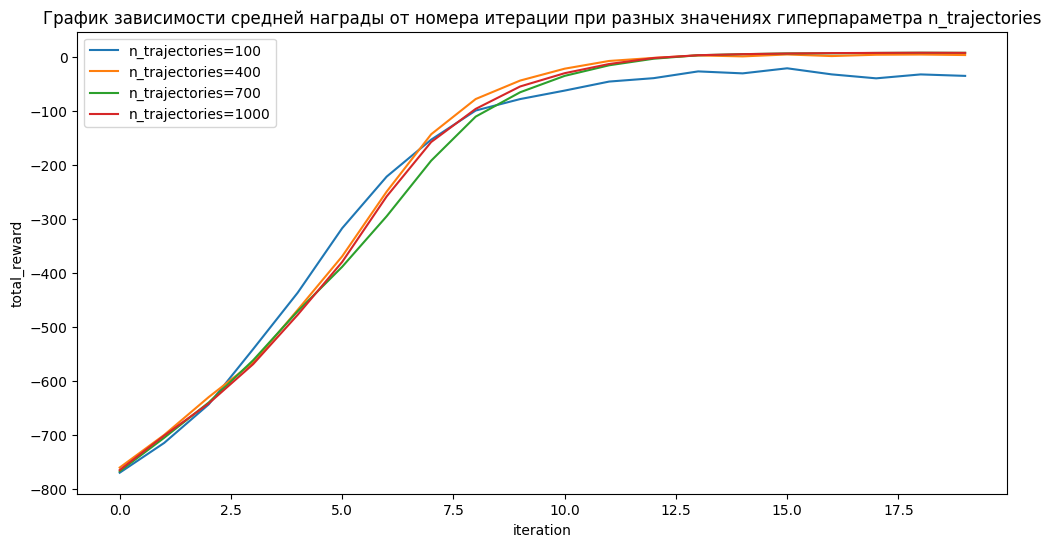

In [52]:
plt.figure(figsize=(12,6))
plt.plot(np.arange(0, 20), rewards_n_trajectories_100, label='n_trajectories=100')
plt.plot(np.arange(0, 20), rewards_n_trajectories_400, label='n_trajectories=400')
plt.plot(np.arange(0, 20), rewards_n_trajectories_700, label='n_trajectories=700')
plt.plot(np.arange(0, 20), rewards_n_trajectories_1000, label='n_trajectories=1000')
plt.title('График зависимости средней награды от номера итерации при разных значениях гиперпараметра n_trajectories')
plt.xlabel('iteration')
plt.ylabel('total_reward')
plt.legend()
plt.savefig('plot_n_trajectories.png')
plt.show()

#### Выводы по заданию №1:
Проведя исследование гиперпараметров q (квантиль, определяющий количество "элитных" траекторий), n_trajectories (количество траекторий) и n_iteration (количество итераций) можно сделать вывод о наличии взяимосвязи между этими гиперпараметрами, и изменением одного можно компенсировать (не всегда) изменение другого и обеспечить алгоритму сходимость к одному максимуму средней награды (в моем случае около 7.6). Например, проведя анализ гиперпараметра q при фиксированных остальных, по графику видно, что при q=0.9 алгоритм не сходится к максимуму (хотя при увелечении количества траекторий сойдется), при q=0.5 и q=0.7 сходится разным путем, но примерно к одному значению итераций 13, а при q=0.3 количества итераций равного 20 не хватило для достижения сходимости. По анализу количества траекторий видно, что алгоритм сходится к меньшему значению только при количестве траекторий 100. Также важным ресурсом, учавствущим в анализе является время выполнения (быстродействие), поскольку при усложнении задачи (увеличении количества состояний) задача может решаться достаточно долго. 

Учитывая изложенное, лучшими гиперпараметрами опредлены: q=0.5, n_iteration=20, n_trajectories=1000 (reward=7.6).

### Задание №2
#### Реализовать алгоритм Кросс-Энтропии с двумя типами сглаживания,  указанными в лекции 1. При выбранных в пункте 1 гиперпараметров сравнить их результаты с результатами алгоритма без сглаживания.

Реализован алгоритм в файле hw12.py (изменен только метод fit и имя класса).

In [115]:
%%time
env = gym.make('Taxi-v3')
agent = AgentCrossEntropyLaplace(action_n, taxi_loc_n, pass_loc_n, dest_loc_n, 0.2)
rewards_l_laplace_02 = main_func(env, agent, 0.5, 20, 1000, False)

CPU times: user 1min 6s, sys: 372 ms, total: 1min 6s
Wall time: 1min 6s


In [116]:
%%time
env = gym.make('Taxi-v3')
agent = AgentCrossEntropyLaplace(action_n, taxi_loc_n, pass_loc_n, dest_loc_n, 0.5)
rewards_l_laplace_05 = main_func(env, agent, 0.5, 20, 1000, False)

CPU times: user 1min 14s, sys: 604 ms, total: 1min 14s
Wall time: 1min 14s


In [117]:
%%time
env = gym.make('Taxi-v3')
agent = AgentCrossEntropyLaplace(action_n, taxi_loc_n, pass_loc_n, dest_loc_n, 0.8)
rewards_l_laplace_08 = main_func(env, agent, 0.5, 20, 1000, False)

CPU times: user 1min 14s, sys: 448 ms, total: 1min 14s
Wall time: 1min 14s


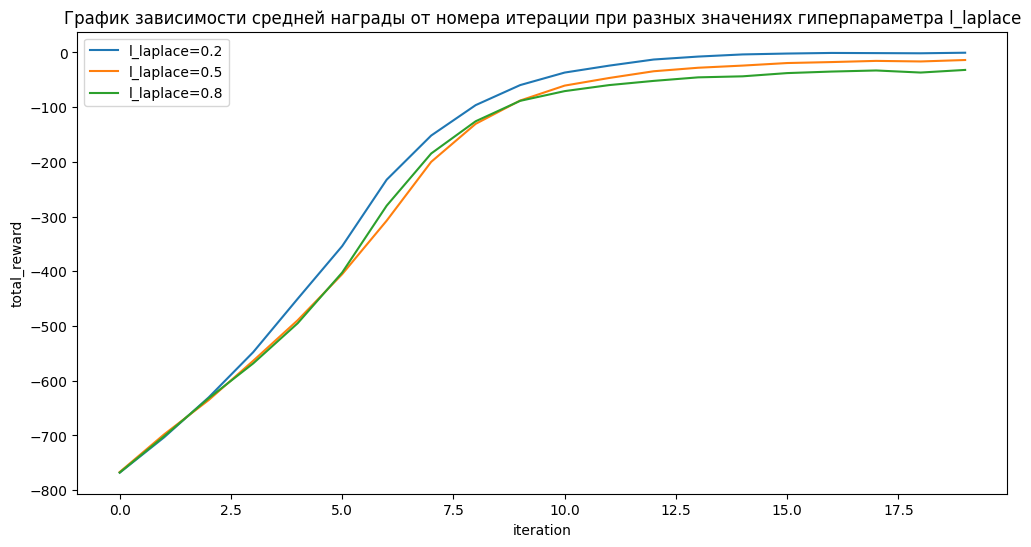

In [118]:
plt.figure(figsize=(12,6))
plt.plot(np.arange(0, 20), rewards_l_laplace_02, label='l_laplace=0.2')
plt.plot(np.arange(0, 20), rewards_l_laplace_05, label='l_laplace=0.5')
plt.plot(np.arange(0, 20), rewards_l_laplace_08, label='l_laplace=0.8')
plt.title('График зависимости средней награды от номера итерации при разных значениях гиперпараметра l_laplace')
plt.xlabel('iteration')
plt.ylabel('total_reward')
plt.legend()
plt.savefig('plot_l_laplace.png')
plt.show()

#### Выводы по заданию №2:
Очевидно, что параметр l_laplace становится еще одним гиперпараметром, который не существует в вакууме, а взаимосвязанных с 3-мя описанными выше, и идеальной отметки сходимости можно добиться занулив его или сильно увеличив количество итераций (на самом деле добиться схожего качества по средней награде при использовании сглаживания не удалось, вроде в теории кажется что можно взять q=больше и просто его сглаживать, но алгоритм неизменно сходится к худшему качеству от -30 до -10).

### Задание №3
#### Реализовать модификацию алгоритм Кросс-Энтропии для стохастических сред, указанную в лекции 1. Сравнить ее результат с алгоритмами из пунктов 1 и 2.

Реализован алгоритм в файле hw13.py 

Добавлена функция создания детерминированной политики, в оценку траекторий добавлено семплирование детерминированных политик и семплирование траекторий для политики, оценка проводится политики, а в "элитные" траектории попадают все траектории политики, средняя оценка которой выше заданного квантиля.

In [4]:
%%time
env = gym.make('Taxi-v3')
agent = AgentCrossEntropyLaplace(action_n, taxi_loc_n, pass_loc_n, dest_loc_n, 0.0)
rewards_k100_n50 = main_func_stohastic(env, agent, q=0.5, k_politics=100, n_iteration=40, n_trajectories=50, pr=False)

CPU times: user 14min 3s, sys: 3.21 s, total: 14min 6s
Wall time: 14min 2s


In [5]:
%%time
env = gym.make('Taxi-v3')
agent = AgentCrossEntropyLaplace(action_n, taxi_loc_n, pass_loc_n, dest_loc_n, 0.0)
rewards_k200_n25 = main_func_stohastic(env, agent, q=0.5, k_politics=200, n_iteration=40, n_trajectories=25, pr=False)

CPU times: user 14min 51s, sys: 3.82 s, total: 14min 55s
Wall time: 14min 52s


In [6]:
%%time
env = gym.make('Taxi-v3')
agent = AgentCrossEntropyLaplace(action_n, taxi_loc_n, pass_loc_n, dest_loc_n, 0.0)
rewards_k400_n12 = main_func_stohastic(env, agent, q=0.5, k_politics=400, n_iteration=40, n_trajectories=12, pr=False)

CPU times: user 15min 52s, sys: 3.3 s, total: 15min 55s
Wall time: 15min 52s


In [11]:
%%time
env = gym.make('Taxi-v3')
agent = AgentCrossEntropyLaplace(action_n, taxi_loc_n, pass_loc_n, dest_loc_n, 0.0)
rewards_k50_n200 = main_func_stohastic(env, agent, q=0.5, k_politics=50, n_iteration=40, n_trajectories=200, pr=False)

CPU times: user 26min 34s, sys: 11.6 s, total: 26min 46s
Wall time: 26min 31s


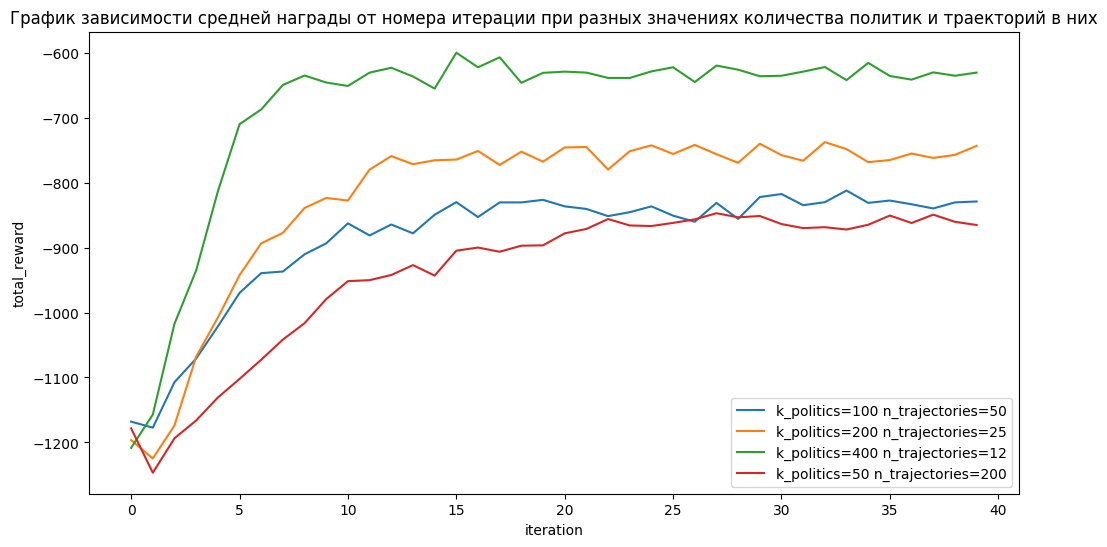

In [12]:
plt.figure(figsize=(12,6))
plt.plot(np.arange(0, 40), rewards_k100_n50, label='k_politics=100 n_trajectories=50')
plt.plot(np.arange(0, 40), rewards_k200_n25, label='k_politics=200 n_trajectories=25')
plt.plot(np.arange(0, 40), rewards_k400_n12, label='k_politics=400 n_trajectories=12')
plt.plot(np.arange(0, 40), rewards_k50_n200, label='k_politics=50 n_trajectories=200')
plt.title('График зависимости средней награды от номера итерации при разных значениях количества политик и траекторий в них')
plt.xlabel('iteration')
plt.ylabel('total_reward')
plt.legend()
plt.savefig('plot_stohastic.png')
plt.show()

#### Выводы по заданию №3:
Очевидно, что добиться уровня качества используя подход стохастической среды для детерминированной не получится, однако анализ графика показывает, что для достижения более качественного результата необходимо увеличивать количество траекторий в политике (не уменьшая их количества).